# Logistic Regression using sklearn on IRIS and MNIST DATASET

Logistic Regression using sklearn on IRIS DATASET

In [1]:
#step-1 import all libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#step 2 import dataset
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\iris ds.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
print(df.shape)
set(df['variety'])

(150, 5)


{'Setosa', 'Versicolor', 'Virginica'}

In [4]:
#step-3 preprocessing of dataset
#changing y according to their occurance using unique func
keys=df['variety'].unique()
values=[i for i in range(len(keys))]
mapp=dict(zip(keys,values))
print(mapp)
#replacing y by their index
df['variety']=df['variety'].replace(keys,values)

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}


In [5]:
#step-4 separating features and target
x=df.drop('variety',axis=1)
y=df['variety']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [6]:
#step-5 
#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
#step-6
# choosing correct algo
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
#step-7 predicting labels
y_pred=model.predict(x_test)

In [9]:
y_pred

array([1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 1, 0, 1, 1, 1, 0], dtype=int64)

In [10]:
#step-8
#finding accuracy from scratch
correct = 0
incorrect = 0
for i in range(30):
    if y_pred[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/30) * 100
incorrect = 30 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy = ', accuracy)

correct =  30 : incorrect =  0
Accuracy =  100.0


In [11]:
#Now we have our actual and predicted values of y
both=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
both

,y_test,y_pred
99,1,1
136,2,2
14,0,0
131,2,2
139,2,2
48,0,0
94,1,1
3,0,0
85,1,1
38,0,0


In [12]:
#step-9 forming confusion matrix from scratch
confusion_matrix = pd.crosstab(both['y_test'], both['y_pred'])
print (confusion_matrix)

y_pred   0   1   2
y_test            
0       10   0   0
1        0  10   0
2        0   0  10


[Text(0.5, 28.5, 'ACTUAL VALUES'),
 Text(28.5, 0.5, 'PREDICTED VALUES'),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

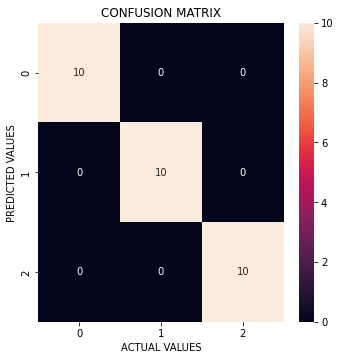

In [13]:
fig=plt.figure(figsize=(5.5,5.5))
a=sn.heatmap(confusion_matrix,annot=True)
a.set(xlabel='ACTUAL VALUES',ylabel='PREDICTED VALUES',title='CONFUSION MATRIX')

In [14]:
#step-10 finding precision,recall and F score from confusion matrix
for i in range(confusion_matrix.shape[0]):
    tp=confusion_matrix.iloc[i,i]
    fp=confusion_matrix.iloc[i,:].sum()-tp
    fn=confusion_matrix.iloc[:,i].sum()-tp
    tn=confusion_matrix.sum().sum()-tp-fp-fn
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*(precision*recall)/(precision+recall)
    print('for class {} is:'.format(confusion_matrix.index[i]),precision,recall,f1_score)

for class 0 is: 1.0 1.0 1.0
for class 1 is: 1.0 1.0 1.0
for class 2 is: 1.0 1.0 1.0


In [15]:
#step-10 finding precision,recall and F score from confusion matrix
#y_test=np.array(y_test)
#y_pred=np.array(y_pred)
#def metric(y_test,y_pred):
#    tp,tn,fp,fn=0,0,0,0
#    for i in range(len(y_test)):
#        if y_test[i]==1 and y_pred[i]==1:
#            tp+=1
#        elif y_test[i]==0 and y_pred[i]==0:
#            tn+=1
#        elif y_test[i]==1 and y_pred[i]==0:
#            fn+=1
#        elif y_test[i]==0 and y_pred[i]==1:
#            fp+=1
#    precision=tp/(tp+fp)
#    recall=tp/(tp+fn)
#    f1_score=2*precision*recall/(precision+recall)
#    return precision,recall,f1_score
#precision,recall,f1_score= metric(y_test,y_pred)
#print(precision,recall,f1_score)

Logistic Regression using sklearn on MNIST DATASET

In [16]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist['frame']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [17]:
x_1=mnist.data
y_1=mnist.target

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_1,y_1,test_size=0.2,random_state=0)

In [19]:
#from sklearn.preprocessing import StandardScaler
#s= StandardScaler()
#x_train=s.fit_transform(x_train)
#x_test=s.transform(x_test)

In [20]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
yp=reg.predict(x_test)
yp

array(['0', '4', '1', ..., '7', '4', '6'], dtype=object)

In [22]:
len(yp)

14000

In [23]:
#finding accuracy from scratch
correct = 0
incorrect = 0
for i in range(14000):
    if yp[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/14000) * 100
incorrect = 14000 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy = ', accuracy)

correct =  12841 : incorrect =  1159
Accuracy =  91.72142857142858


In [24]:
val=pd.DataFrame({'y_test':y_test,'yp':yp})
val

,y_test,yp
10840,0,0
56267,4,4
14849,1,1
62726,2,2
47180,7,4
...,...,...
29357,3,3
52488,2,2
9603,7,7
34949,4,4


In [25]:
#plotting confusion matrix
c = pd.crosstab(val['y_test'], val['yp'])
print (c)

yp         0     1     2     3     4     5     6     7     8     9
y_test                                                            
0       1348     0     3     2     2    11    14     1     6     0
1          0  1541     6     5     2     4     1     5    14     2
2          6    17  1294    19    20     4    16    13    50     4
3          5     5    50  1261     1    43     4    13    39    14
4          2     4     9     2  1259     2    15    11     6    40
5         11     5    12    46    13  1053    22     7    49    13
6         13     5    14     1    16    20  1310     3     5     0
7          3     6    21     6    15     1     1  1347     7    51
8          4    34    11    31     9    38    16     2  1210    13
9          4     4    10    16    49     7     1    39    13  1218


[Text(0.5, 33.0, 'ACTUAL VALUES'),
 Text(33.0, 0.5, 'PREDICTED VALUES'),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

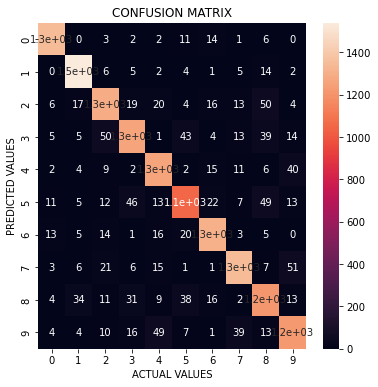

In [26]:
fig=plt.figure(figsize=(6,6))
b=sn.heatmap(c,annot=True)
b.set(xlabel='ACTUAL VALUES',ylabel='PREDICTED VALUES',title='CONFUSION MATRIX')

In [27]:
#finding precision,recall and F score from confusion matrix
for i in range(c.shape[0]):
    tp=c.iloc[i,i]
    fp=c.iloc[i,:].sum()-tp
    fn=c.iloc[:,i].sum()-tp
    tn=c.sum().sum()-tp-fp-fn
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*(precision*recall)/(precision+recall)
    print('for class {} is:'.format(c.index[i]),precision ,recall, f1_score)

for class 0 is: 0.9718817591925017 0.9656160458452722 0.9687387711103126
for class 1 is: 0.9753164556962025 0.9506477483035164 0.9628241174632928
for class 2 is: 0.8967428967428968 0.9048951048951049 0.9008005569091542
for class 3 is: 0.8787456445993032 0.9078473722102232 0.8930594900849859
for class 4 is: 0.9325925925925926 0.9083694083694084 0.9203216374269008
for class 5 is: 0.8554021121039805 0.8901098901098901 0.8724109362054681
for class 6 is: 0.9444844989185291 0.9357142857142857 0.9400789379260854
for class 7 is: 0.9238683127572016 0.9347675225537821 0.9292859606760953
for class 8 is: 0.8845029239766082 0.8649035025017869 0.8745934224792192
for class 9 is: 0.8949301983835415 0.8988929889298893 0.8969072164948454


In [32]:
#y_test=np.array(y_test)
#yp=np.array(yp)
#def metric(y_test,yp):
#    tp,tn,fp,fn=0,0,0,0
#    for i in range(len(y_test)):
#        if y_test[i]==1 and yp[i]==1:
#             tp+=1
#        elif y_test[i]==0 and yp[i]==0:
#            tn+=1
#        elif y_test[i]==1 and yp[i]==0:
#            fn+=1
#        elif y_test[i]==0 and yp[i]==1:
#            fp+=1
#    precision=tp/(tp+fp)
#    recall=tp/(tp+fn)
#    f1_score=2*precision*recall/(precision+recall)
#    return precision,recall,f1_score

In [31]:
#try:
#    precision,recall,f1_score= metric(y_test,yp)
#except ZeroDivisionError:
#    result = 0
#print(precision,recall,f1_score)

In [ ]:
#if it is unbalanced we use precision and recall